### Problem Statement

You have been provided with a dataset named **`"hotel_reservations.csv"`**, which includes various attributes related to hotel bookings. The dataset comprises the following columns:

- `booking_id:` unique identifier of each booking
- `no_of_adults:` Number of adults
- `no_of_children:` Number of Children
- `no_of_weekend_nights:` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `no_of_week_nights:` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `type_of_meal_plan:` Type of meal plan booked by the customer
- `required_car_parking_space:` Does the customer require a car parking space? (0 - No, 1- Yes)
- `room_type_reserved:` Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
- `lead_time:` Number of days between the date of booking and the arrival date
- `arrival_year:` Year of arrival date
- `arrival_month:` Month of arrival date
- `arrival_date:` Date of the month
- `market_segment_type:` Market segment designation
- `repeated_guest:` Is the customer a repeated guest? (0 - No, 1- Yes)
- `no_of_previous_cancellations:` Number of previous bookings that were canceled by the customer prior to the current booking
- `no_of_previous_bookings_not_canceled:` Number of previous bookings not canceled by the customer prior to the current booking
- `avg_price_per_room:` Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- `no_of_special_requests:` Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- `booking_status:` Flag indicating if the booking was canceled or not (Not_Canceled = 0, Canceled = 1)


You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, random forest, and Naive Bayes. Additionally, you will implement k-fold cross-validation, stratified k-fold cross-validation, grid search, and randomized search techniques.

**Dataset Credits:** Ahsan Raza (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

**Import Necessary Libraries**


In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### Task 1: Data Preprocessing and EDA

1. Import the data from the `"hotel_reservations.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
5. Remove the columns `booking_id, arrival_year, arrival_month, and arrival_date` as they do not add significant value to the predictive model.
6. Visualize the booking_status using a count plot.
7. Visualize the lead time for canceled and not canceled bookings using a box plot.
8. Visualize the average price per room for canceled and not canceled bookings using a box plot.
9. Encode categorical variables: type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.

In [2]:
# Import the data from the "hotel_reservations.csv" file and store it in a variable df.
df = pd.read_csv("datasets\\hotel_reservations.csv")

# Display the number of rows and columns in the dataset
print(df.shape)

# Display the first few rows of the dataset to get an overview
df.sample(7)

(36275, 19)


,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2235,INN02236,2,0,2,1,Meal Plan 1,0,Room_Type 4,15,2017,10,31,Online,0,0,0,117.00,1,Not_Canceled
9554,INN09555,2,0,0,1,Meal Plan 1,0,Room_Type 1,3,2018,6,17,Online,0,0,0,141.00,2,Not_Canceled
17453,INN17454,2,0,1,3,Meal Plan 1,0,Room_Type 1,66,2017,10,19,Online,0,0,0,89.25,2,Not_Canceled
20881,INN20882,3,0,1,2,Meal Plan 1,0,Room_Type 4,283,2018,12,23,Online,0,0,0,110.70,2,Not_Canceled
23507,INN23508,2,0,1,2,Meal Plan 1,0,Room_Type 1,203,2018,9,5,Offline,0,0,0,80.75,0,Not_Canceled
21916,INN21917,2,0,0,3,Meal Plan 1,0,Room_Type 1,12,2017,8,5,Corporate,0,0,0,65.00,0,Not_Canceled
19321,INN19322,1,0,2,4,Meal Plan 1,0,Room_Type 1,69,2018,6,12,Offline,0,0,0,120.00,0,Canceled


In [3]:
# Remove the columns booking_id, arrival_year, arrival_month, and arrival_date
df.drop(columns=['booking_id', 'arrival_year', 'arrival_month','arrival_date'], axis="columns", inplace=True)

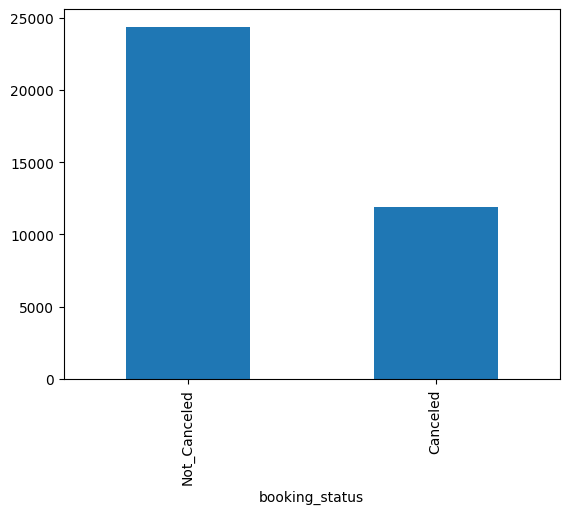

In [4]:
# Visualize the booking_status
df["booking_status"].value_counts().plot(kind="bar")
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


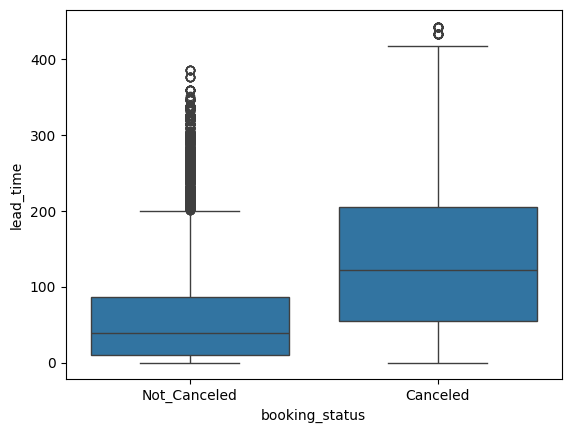

In [18]:
# Visualize the lead time for canceled and not canceled bookings using a box plot
sns.boxplot(x="booking_status" , y ="lead_time", data=df)
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


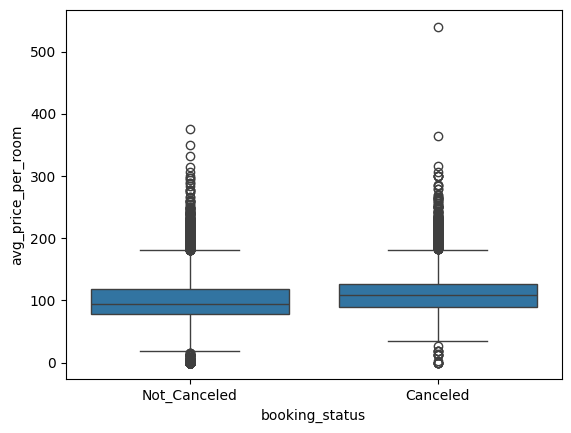

In [5]:
# Visualize the average price per room for canceled and not canceled
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.show() 


In [6]:
# Encode categorical variables : type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.
df_encoded = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved','market_segment_type'], drop_first=True)
df_encoded.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,0,0,0,60.00,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,0,0,0,94.50,...,False,False,False,False,False,False,False,False,False,True


### Task 2: Feature Scaling

1. Standardize the numerical features `lead_time` and `avg_price_per_room`.
2. Define features (X) and target (y).

In [22]:
# Standardize the numerical features
scaler =  StandardScaler()
df_encoded[["lead_time", "avg_price_per_room"]] = scaler.fit_transform(df[["lead_time", "avg_price_per_room"]])



# Define features(X) and target (y: booking_status)
X = df_encoded.drop("booking_status", axis=1)
y = df_encoded["booking_status"]


### Task 3: Implementing K-Fold Cross Validation

1. Initialize a KFold cross-validator with 7 splits.
2. Perform k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform k-fold cross-validation using a decision tree classifier and calculate the average accuracy.

In [34]:
from sklearn.model_selection import StratifiedKFold

# Initialize KFold with 7 splits.
skf = StratifiedKFold(shuffle=True, random_state=42, n_splits=7)

# Cross validation with Naive Bayes
model_nb = GaussianNB()
nb_score = cross_val_score(estimator=model_nb, X=X, y=y, cv=skf, scoring="accuracy")
print("Naive Bayes score: ", nb_score.mean())
# Cross validation with Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
lr_score = cross_val_score(estimator=model_lr, X=X, y=y, cv=skf, scoring="accuracy")
print("Logistic Regression score: ", lr_score.mean())

# Cross validation with Decision Tree
model_dt = DecisionTreeClassifier()
dt_score = cross_val_score(estimator=model_dt, X=X, y=y, cv=skf, scoring="accuracy")
print("Decision Tree score: ", dt_score.mean())


Naive Bayes score:  0.40862851035462067
Logistic Regression score:  0.7997519011703228
Decision Tree score:  0.85833213542422


### Task 5: Implementing Grid Search CV

1. Initialize GridSearchCV with Naive Bayes and Random Forest:
    - Naive Bayes: var_smoothing [1e-9, 1e-8, 1e-7]
    - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15]
<br></br>
2. Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
3. Print the best parameters for each model.

In [35]:
# Initialize GridSearchCV with Naive Bayes and Random Forest 
model_params = {
    "naive_bayes" : {
        "model" : GaussianNB(),
        "params" : {
            "var_smoothing" : [1e-9, 1e-8, 1e-7]
        }
    }, 
    "random_forest" : {
        "model" : RandomForestClassifier(),
        "params" : {
            "n_estimators" : [10,50,100],
            "max_depth" : [5,10,15]
        }
    }
}


# Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
scores=[]

for key, val in model_params.items():
    clf = GridSearchCV(estimator=val["model"],
                       param_grid=val["params"],
                       cv=skf,
                       scoring="accuracy",
                       return_train_score=True
                       )
    try:
        clf.fit(X, y)
        scores.append({
            "model" : key,
            "best_score" : clf.best_score_,
            "best_params" : clf.best_params_
        })
    except Exception as e:
        print(f"Model {key} failed: {e}")


# Print the best parameters for each model.
df_scores = pd.DataFrame(scores)
df_scores.sort_values(by="best_score", ascending=False)

,model,best_score,best_params
1,random_forest,0.878070,"{'max_depth': 15, 'n_estimators': 50}"
0,naive_bayes,0.409483,{'var_smoothing': 1e-07}


### Task 6: Implementing Randomized Search CV

1. Initialize RandomizedSearchCV for RandomForest with the given parameters:
   - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15, 20]
<br></br>
2. Fit RandomizedSearchCV with RandomForest model and find the best parameters.
2. Print the best parameters.

In [40]:
# Initialize RandomizedSearchCV and fit with RandomForest model
params = {
    "n_estimators" : [10,50,100],
    "max_depth" : [5,10,15,20]
}
clf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=params, scoring="accuracy")
clf.fit(X,y)
# Print Best Parameters

print("best score :", clf.best_score_)
print("best params :", clf.best_params_)
df = pd.DataFrame(clf.cv_results_)
df

best score : 0.8864231564438319
best params : {'n_estimators': 100, 'max_depth': 20}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.190451,0.036911,0.065648,0.002223,50,20,"{'n_estimators': 50, 'max_depth': 20}",0.881737,0.887388,0.884769,0.890420,0.882426,0.885348,0.003219,2
1,1.278449,0.018295,0.074267,0.002928,100,10,"{'n_estimators': 100, 'max_depth': 10}",0.864232,0.854032,0.849483,0.856099,0.846864,0.854142,0.006005,7
2,0.645807,0.019559,0.040837,0.000749,50,10,"{'n_estimators': 50, 'max_depth': 10}",0.863542,0.857340,0.848243,0.854997,0.848243,0.854473,0.005803,6
3,0.771930,0.018754,0.053249,0.000749,100,5,"{'n_estimators': 100, 'max_depth': 5}",0.797243,0.799173,0.790351,0.789800,0.793935,0.794101,0.003693,10
4,0.394475,0.005766,0.030828,0.000400,50,5,"{'n_estimators': 50, 'max_depth': 5}",0.799311,0.812681,0.807719,0.814473,0.782495,0.803336,0.011672,9
5,0.908907,0.010635,0.052648,0.000490,50,15,"{'n_estimators': 50, 'max_depth': 15}",0.873742,0.878567,0.876499,0.880083,0.869607,0.875700,0.003715,4
6,1.792728,0.013312,0.096791,0.000399,100,15,"{'n_estimators': 100, 'max_depth': 15}",0.874294,0.879256,0.874845,0.879118,0.870159,0.875534,0.003394,5
7,0.148896,0.006622,0.015361,0.000434,10,10,"{'n_estimators': 10, 'max_depth': 10}",0.855272,0.850310,0.850861,0.849759,0.832667,0.847774,0.007802,8
8,2.315578,0.027567,0.119709,0.001021,100,20,"{'n_estimators': 100, 'max_depth': 20}",0.883115,0.888629,0.886423,0.891247,0.882702,0.886423,0.003254,1
9,0.249096,0.004062,0.019818,0.000749,10,20,"{'n_estimators': 10, 'max_depth': 20}",0.874156,0.880772,0.876912,0.885183,0.877602,0.878925,0.003771,3
